In [109]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import datetime
%matplotlib inline

In [110]:
my_text = np.loadtxt('/Users/scollis/KLOT may rains')

In [111]:
my_text.shape

(50, 6)

In [112]:
mays = np.zeros([150,2]) 

In [113]:
mays[0:50,0] = my_text[:,0]
mays[50:100,0] = my_text[:,2]
mays[100:150,0] = my_text[:,4]

mays[0:50,1] = my_text[:,1]
mays[50:100,1] = my_text[:,3]
mays[100:150,1] = my_text[:,5]

years = mays[:,1]
rain = mays[:,0]


Text(0, 0.5, 'May accumulated rainfall (In)')

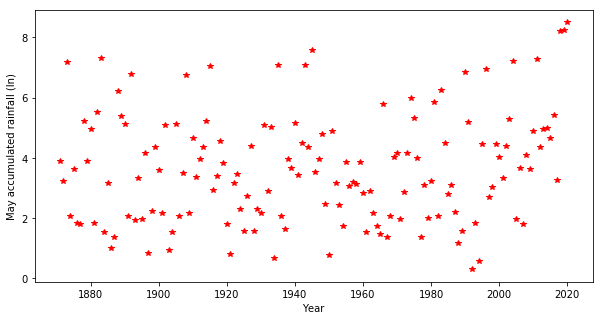

In [114]:
mf = plt.figure(figsize=[10,5])
plt.plot(years, rain, 'r*')
plt.xlabel('Year')
plt.ylabel('May accumulated rainfall (In)')

In [115]:
ast = np.argsort(years)
yearss = years[ast]
rains = rain[ast]

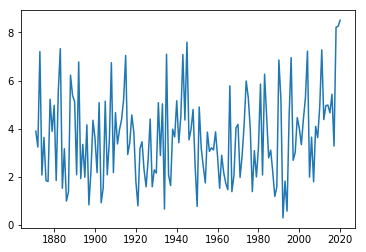

In [116]:
plt.plot(yearss, rains)

In [117]:
bins = 6
r1 = 0
r2 = 9

In [118]:
first, e1 = np.histogram(rains[0:75], bins=bins, range=(r1,r2))
second, e2 = np.histogram(rains[75:150],  bins=bins, range=(r1,r2))

In [119]:
de1 = e1[1] - e1[0]
xax = e1[0:bins] - de1/2.

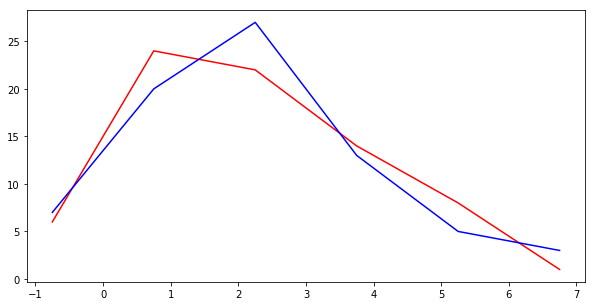

In [120]:
fm = plt.figure(figsize=[10,5])
plt.plot(xax,first, 'r-')
plt.plot(xax,second, 'b-')


In [121]:
dts = [datetime.datetime(int(i), 5,31) for i in yearss]
dti = pd.to_datetime(dts)

In [122]:
df = pd.DataFrame({'mayrain': rains}, index=dti)

In [123]:
df

,mayrain
1871-05-31,3.90
1872-05-31,3.24
1873-05-31,7.20
1874-05-31,2.08
1875-05-31,3.64
1876-05-31,1.85
1877-05-31,1.81
1878-05-31,5.22
1879-05-31,3.89
1880-05-31,4.97


In [130]:
decades = df.groupby((df.index.year//10)*10)
means = decades.mean()
stdevs = decades.std()

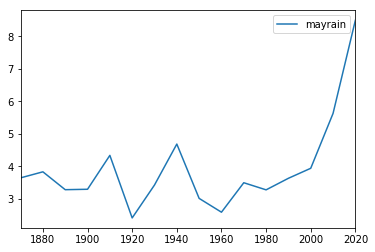

In [131]:
means.plot()

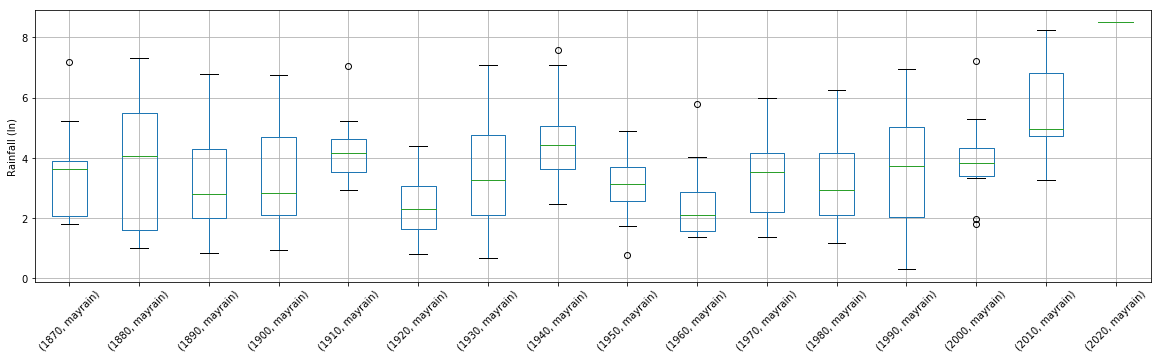

In [135]:
fm = plt.figure(figsize=[20,5])

decades.boxplot(subplots=False, rot=45)
plt.ylabel('Rainfall (In)')
plt.savefig('BW-may-rains.png')

In [133]:
decades.boxplot?